# Analysis of $\gamma$ influence  

This notebook should be used to analyse the experiments in the \out folder on the evolution of the Lagrange multiplier $\mu$ and the average energy.


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from experiment_manager.explorer import make_index, get_immediate_subdirectories, get_siblings

In [6]:
# If the index wasn't already built, execute this 
# make_index()

In [7]:
# Use parameters_database.csv to find a suitable base experiment
base_exp = '098c33ae6ac22f7b'
param_to_vary = 'gamma'

hashs_of_interest, param_values = get_siblings(base_exp, param_to_vary)

To vary parameter gamma in [   0.     1.     1.5    3.     6.    10.    50.   100.  1000. ], visit ['c800bbdb42d430f5' '098c33ae6ac22f7b' '241089c579e060cd'
 'f613931e6c5a53f8' 'c91bafd6bd393c8c' 'fc6343fa6dd4ac83'
 '8faf25aeb217441d' '990df370b437c0e3' '964f8fe7de8acddd']


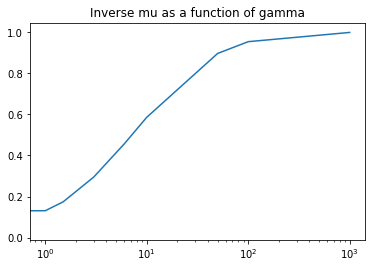

In [15]:
# For each experiment, look at the last part of the mu curve 
# If stable, plot the inverse of $\mu_{\infty}$, otherwise 0 -> should see a PT in gamma

mu_inf_inv = []
for exp_hash in hashs_of_interest:
    mu_rec = np.load('out/raw/{}/mu_avg.npy'.format(exp_hash))[-100:]
    mu_std_criterion = np.load('out/raw/{}/mu_std.npy'.format(exp_hash))[-100]
    
    if mu_rec[-1] > mu_rec[0] + 2 * mu_std_criterion or mu_rec[-1] < mu_rec[0] - 5 * mu_std_criterion:
        mu_inf_inv.append(0)
        continue
    else:
        mu_inf_inv.append(1. / mu_rec[-1])
        
plt.figure()
plt.semilogx(param_values, mu_inf_inv)
plt.title('Inverse mu as a function of {}'.format(param_to_vary))
plt.savefig('out/processed/mu_inv_{}.pdf'.format(param_to_vary))
plt.show()

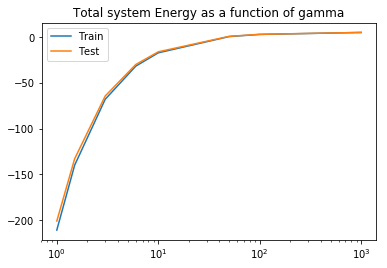

In [23]:
# For each experiment, look at the last part of the E curve 

E_inf_inv_train = []
for exp_hash in hashs_of_interest[1:]:
    E_inf_inv_train.append(np.load('out/raw/{}/E_train_avg.npy'.format(exp_hash))[-1])
        
E_inf_inv_test = []
for exp_hash in hashs_of_interest[1:]:
    E_inf_inv_test.append(np.load('out/raw/{}/E_test_avg.npy'.format(exp_hash))[-1])
        
plt.figure()
plt.semilogx(param_values[1:], E_inf_inv_train, label='Train')
plt.semilogx(param_values[1:], E_inf_inv_test, label='Test')
plt.title('Total system Energy as a function of {}'.format(param_to_vary))
plt.legend()
plt.savefig('out/processed/E_{}.pdf'.format(param_to_vary))
plt.show()